# Correlation plot

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng

import ruamel.yaml    
yaml2 = ruamel.yaml.YAML(typ='rt')
Loader= yaml2.load
loaderkwargs = {}
dumperkwargs = {}

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules: 
  - spectrapoints.py
  executeorder:
  - correlate
  - plotcsv

correlate:
  - name: two-point correlation (AMR-Wind)
    ncfile: /gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD/post_processing/sampling_40000.nc
    group: p_hub
    timerange: [20000, 21000]
    iplane: 0
    probelength: 1000
    probelocationfunction: spectrapoints.probelocations
    plotprobept: True
    saveprefix: correlation
    integrallengthscale:
      savefile: lengthscale.yaml

plotcsv:
  - name: plotRij
    xlabel: xi [m]
    ylabel: '$R_{ij}(xi)$'
    title: 'Two point correlation'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    #postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLong', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Longitudinal'}}
    - {'file':'correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLat',  'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'Lateral'}}
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized correlate
Running correlate
/gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD/post_processing/sampling_40000.nc 2001
[============================================================] 100.0% 
Ncount = 2001

WS   = [6.247019794102606, 0.4724633941961358, -3.090360976501493e-05]
Wdir = 265.6749421890501
355.67
[============================================================] 100.0% 
Initialized integrallengthscale inside correlate
Executing integrallengthscale
LONG lengthscale = 161.902771
LAT lengthscale  = 48.864968
Initialized plotcsv
Running plotcsv


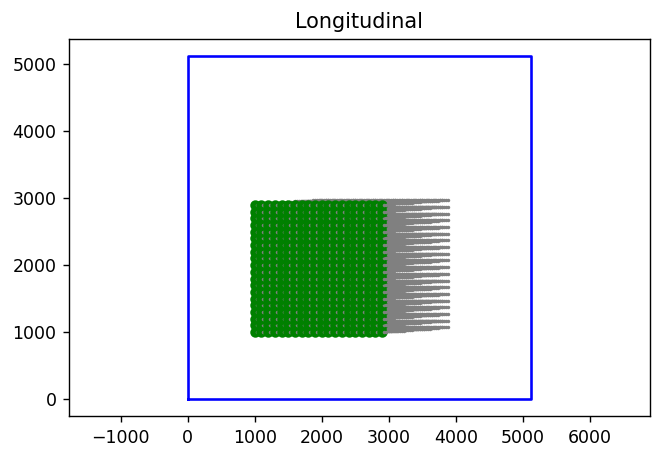

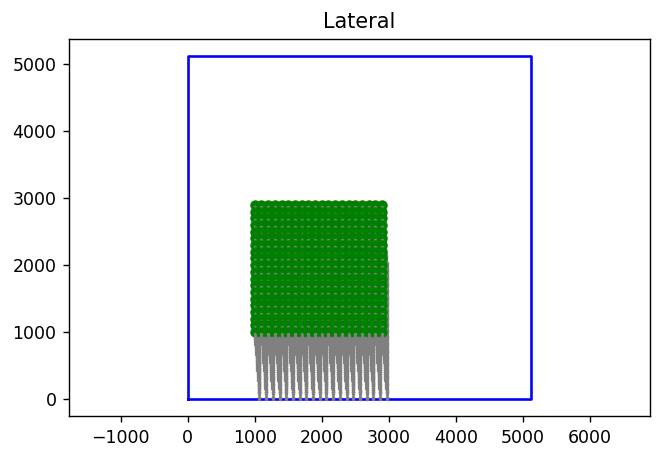

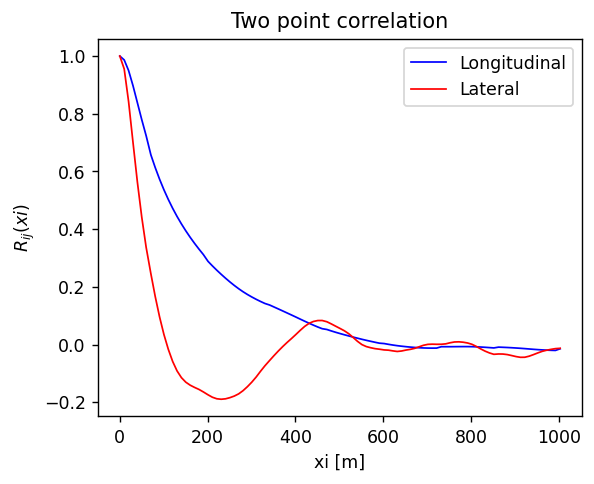

In [4]:
# Run the driver
ppeng.driver(yamldict, verbose=True)